In [68]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Decsription:

#### Longley's Economic Regression Data

$\underline{Description}$

A macroeconomic data set which provides a well-known example for a highly collinear regression.

$\underline{Usage}$

longley

$\underline{Format}$

A data frame with 6 economical variables, observed yearly from 1947 to 1962 (n=16).

$\underline{GNP.deflator}$


GNP implicit price deflator (1954=100)

$\underline{GNP}$

Gross National Product.

$\underline{Unemployed}$

Number of unemployed.

$\underline{Armed.Forces}$

number of people in the armed forces.

$\underline{Population}$

‘noninstitutionalized’ population ≥ 14 years of age.

$\underline{Employed}$

number of people employed.

$\underline{Source}$

J. W. Longley (1967) An appraisal of least-squares programs from the point of view of the user. Journal of the American Statistical Association 62, 819–841. *bold text*'

Let us now load the data and chec the first few rows of each variable

In [69]:
df_1 = pd.read_csv("longley.csv")
df_1.head()
# To make the linear Regression they wanted to keep y=TOTEMP and the rest was all X's (TOTEMP  = Total employment)
# PCA can be and should be run on X's and not on the Y
# Because we are trying to do dimension reduction of the X's

,Obs,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1,60323,83.0,234289,2356,1590,107608,1947
1,2,61122,88.5,259426,2325,1456,108632,1948
2,3,60171,88.2,258054,3682,1616,109773,1949
3,4,61187,89.5,284599,3351,1650,110929,1950
4,5,63221,96.2,328975,2099,3099,112075,1951


In [70]:
df = df_1.drop('TOTEMP', axis=1)
df.head()


,Obs,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1,83.0,234289,2356,1590,107608,1947
1,2,88.5,259426,2325,1456,108632,1948
2,3,88.2,258054,3682,1616,109773,1949
3,4,89.5,284599,3351,1650,110929,1950
4,5,96.2,328975,2099,3099,112075,1951


In [71]:
df2 = df.drop('YEAR', axis=1)
df2.head()

,Obs,GNPDEFL,GNP,UNEMP,ARMED,POP
0,1,83.0,234289,2356,1590,107608
1,2,88.5,259426,2325,1456,108632
2,3,88.2,258054,3682,1616,109773
3,4,89.5,284599,3351,1650,110929
4,5,96.2,328975,2099,3099,112075


In [72]:
df3 = df2.drop('Obs', axis=1)
df3.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289,2356,1590,107608
1,88.5,259426,2325,1456,108632
2,88.2,258054,3682,1616,109773
3,89.5,284599,3351,1650,110929
4,96.2,328975,2099,3099,112075


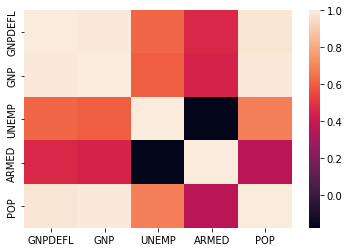

In [73]:
# Data should be highly correlated before PCA can be done. This is the only requirement for PCA.
sns.heatmap(df3.corr())
plt.show()

In [74]:
X=df3
X.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289,2356,1590,107608
1,88.5,259426,2325,1456,108632
2,88.2,258054,3682,1616,109773
3,89.5,284599,3351,1650,110929
4,96.2,328975,2099,3099,112075


In [75]:
Y=df_1["TOTEMP"]
Y.head()

0    60323
1    61122
2    60171
3    61187
4    63221
Name: TOTEMP, dtype: int64

In [76]:
import statsmodels.api as sm
# This adds the constant term beta0 to the Multiple Linear Regression.
X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()
model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     156.4
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           3.70e-09
Time:                        11:42:50   Log-Likelihood:                -117.83
No. Observations:                  16   AIC:                             247.7
Df Residuals:                      10   BIC:                             252.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.246e+04   3.52e+04      2.629      0.025    1.41e+04    1.71e+05
GNPDEFL      -48.4628    132.248     -0.366      0.722    -343.129     246.204
GNP            0.0720      0.032      2.269      0.047       0.001       0.143
UNEMP         -0.4039      0.439     -0.921      0.379      -1.381       0.573
ARMED         -0.5605      0.284     -1.975      0.077      -1.193       0.072
POP           -0.4035      0.330     -1.222      0.250      -1.139       0.332
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.642
Skew:                           0.489   Prob(JB):                        0.725
Kurtosis:                       3.079   Cond. No.                     1.21e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

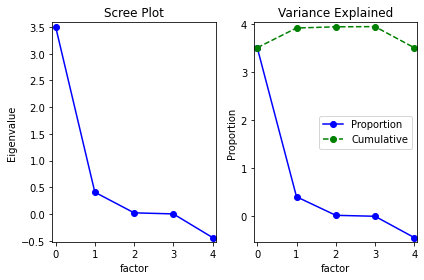

In [77]:
from statsmodels.multivariate.factor import Factor
model=Factor(df3).fit()
model.plot_scree()
plt.show()

In [78]:
from statsmodels.multivariate.pca import PCA

In [79]:
pc = PCA (df3, #It should only have X's
          ncomp=4, #because we are only keeping PC0 and PC1
          standardize=True, #because the data has differenet units Rs./number etc.
          demean=True, # mean centering
          normalize=False #Since we are standardizing, no need to normalize
          )

In [80]:
df_comp = pc.loadings.T #pc.loadings are the eigen vectors that we computed today in excel
#We are transposing it so that we can see it nicely
df_comp

,GNPDEFL,GNP,UNEMP,ARMED,POP
comp_0,0.521013,0.519909,0.365806,0.229642,0.521240
comp_1,-0.058090,-0.053455,0.595323,-0.798315,0.045299
comp_2,0.188915,0.317497,-0.710076,-0.551157,0.235635
comp_3,0.776958,-0.135947,0.004615,-0.078584,-0.609637


In [81]:
# PCA Scores
X_Factors= pc.factors
X_Factors

,comp_0,comp_1,comp_2,comp_3
0,-3.204945,0.776652,0.301445,-0.169601
1,-2.773855,0.877361,0.653574,0.126642
2,-2.104761,1.590765,-0.512299,-0.008744
3,-1.929308,1.318500,-0.128822,-0.059864
4,-1.279159,-1.276178,-0.023850,0.096544
5,-0.893386,-1.985051,-0.162056,0.045618
6,-0.649108,-1.973110,0.065788,-0.073366
7,0.098944,-0.612634,-1.063566,-0.065940
8,0.059434,-0.716200,-0.111650,-0.099272
9,0.352178,-0.565773,0.289121,0.022901


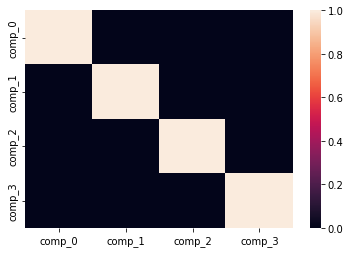

In [82]:
sns.heatmap(X_Factors.corr())
plt.show() #There is correlation because the PCS are orthogonal to each other and multi-collinearity disappears

In [83]:
X_pca=sm.add_constant(X_Factors)
model = sm.OLS(Y,X_pca).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     162.3
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.06e-09
Time:                        11:42:51   Log-Likelihood:                -120.05
No. Observations:                  16   AIC:                             250.1
Df Residuals:                      11   BIC:                             254.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.532e+04    132.360    493.479      0.000     6.5e+04    6.56e+04
comp_0      1701.9208     69.666     24.430      0.000    1548.586    1855.256
comp_1      -380.1542    122.089     -3.114      0.010    -648.870    -111.439
comp_2      1931.6938    296.593      6.513      0.000    1278.896    2584.491
comp_3       349.3240   1084.984      0.322      0.754   -2038.709    2737.357
==============================================================================
Omnibus:                        5.058   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                2.456
Skew:                           0.843   Prob(JB):                        0.293
Kurtosis:                       3.919   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""